In [352]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, mean_squared_error,r2_score, accuracy_score, precision_score, confusion_matrix

In [353]:
info_vehicules = {
1 : "Bicyclette",
2 : "Cyclomoteur <50cm3",
3 : "Voiturette (Quadricycle à moteur carrossé) (anciennement voiturette ou tricycle à moteur)",
4 : "Référence plus utilisée depuis 2006 (scooter immatriculé)",
5 : "Référence plus utilisée depuis 2006 (motocyclette)",
6 : "Référence plus utilisée depuis 2006 (side-car)",
7 : "VL seul",
8 : "Catégorie plus utilisée (VL + caravane)",
9 : "Catégorie plus utilisée (VL + remorque)",
10 : "VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)",
11 : "Référence plus utilisée depuis 2006 (VU (10) + caravane)",
12 : "Référence plus utilisée depuis 2006 (VU (10) + remorque)",
13 : "PL seul 3,5T <PTCA <= 7,5T",
14 : "PL seul > 7,5T",
15 : "PL > 3,5T + remorque",
16 : "Tracteur routier seul",
17 : "Tracteur routier + semi-remorque",
18 : "Référence plus utilisée depuis 2006 (transport en commun)",
19 : "Référence plus utilisée depuis 2006 (tramway)",
20 : "Engin spécial",
21 : "Tracteur agricole",
30 : "Scooter < 50 cm3",
31 : "Motocyclette > 50 cm et <= 125 cm",
32 : "Scooter >50cm et<=125cm",
33 : "Motocyclette",
34 : "Scooer",
35 : "Quad",
36 : "Quad lourd > 50 cm (Quadricycle à moteur non carrossé)",
37 : "Autobus",
38 : "Autocar",
39 : "Train",
40 : "Tramway",
99 : "Autre véhicule",
}

obstacle_labels = {
0 : "inconnu_0",
1 : "Piéton",
2 : "Véhicule",
4 : "Véhicule sur rail",
5 : "Animal domestique 6",
6 : "Animal sauvage",
9 : "Autre",
None : "inconnu",
}

obstacle_fixe_labels = {
0 : "NaN",
1 : "Véhicule en stationnement",
2 : "Arbre",
3 : "Glissière métallique",
4 : "Glissière béton",
5 : "Autre glissière",
6 : "Bâtiment, mur, pile de pont",
7 : "Support de signalisation verticale ou poste d’appel d’urgence ",
8 : "Poteau",
9 : "Mobilier urbain",
10 : "Parapet",
11 : "Ilot, refuge, borne haute",
12 : "Bordure de trottoir",
13 : "Fossé, talus, paroi rocheuse",
14 : "Autre obstacle fixe sur chaussée",
15 : "Autre obstacle fixe sur trottoir ou accotement 16 – Sortie de chaussée sans obstacle",
}

meteo_labels = {
1 : "Normale",
2 : "Pluie légère",
3 : "Pluie forte",
4 : "Neige - grêle",
5 : "Brouillard - fumée",
6 : "Vent fort - tempête",
7 : "Temps éblouissant",
8 : "Temps couvert",
9 : "Autre",}

Mapping file provided with the database to better characterize our data


In [358]:
df = pd.read_csv('/content/sample_data/vehicules_2016.csv', sep=',')
df.columns = ["Num_Acc", "sens_de_Circulation", "catV","nb_occupants", "obstacle_fixe", "obstacle_mobile","choc", "manoeuvre" , "num_vehicule"]
array_obstacle_fixe=np.array(df['obstacle_fixe'])
array_obstacle_fixe = np.nan_to_num(array_obstacle_fixe)

df['catV'] = df['catV'].map(info_vehicules)
df['obstacle_fixe'] = df['obstacle_fixe'].map(obstacle_fixe_labels)
df['obstacle_mobile'] = df['obstacle_mobile'].map(obstacle_labels)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101924 entries, 0 to 101923
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Num_Acc              101924 non-null  int64  
 1   sens_de_Circulation  101852 non-null  float64
 2   catV                 101924 non-null  object 
 3   nb_occupants         101924 non-null  int64  
 4   obstacle_fixe        101187 non-null  object 
 5   obstacle_mobile      101924 non-null  object 
 6   choc                 101913 non-null  float64
 7   manoeuvre            101917 non-null  float64
 8   num_vehicule         101924 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 7.0+ MB


In [359]:
print(df.isnull().sum()) # we identify if cleanning data is necessary

Num_Acc                  0
sens_de_Circulation     72
catV                     0
nb_occupants             0
obstacle_fixe          737
obstacle_mobile          0
choc                    11
manoeuvre                7
num_vehicule             0
dtype: int64


In [360]:
df.dropna(subset=['sens_de_Circulation','choc','manoeuvre','obstacle_fixe'],inplace=True) # We clean data
print(df.isnull().sum())

Num_Acc                0
sens_de_Circulation    0
catV                   0
nb_occupants           0
obstacle_fixe          0
obstacle_mobile        0
choc                   0
manoeuvre              0
num_vehicule           0
dtype: int64


In [362]:
df = df.reset_index(drop=True) # we reset the index of the dataset
print(df)

             Num_Acc  sens_de_Circulation                     catV  \
0       201600000001                  0.0                  VL seul   
1       201600000001                  0.0       Cyclomoteur <50cm3   
2       201600000002                  0.0                  VL seul   
3       201600000003                  0.0                  VL seul   
4       201600000004                  0.0  Scooter >50cm et<=125cm   
...              ...                  ...                      ...   
101112  201600059430                  1.0         Scooter < 50 cm3   
101113  201600059431                  2.0         Scooter < 50 cm3   
101114  201600059431                  1.0         Scooter < 50 cm3   
101115  201600059432                  1.0       Cyclomoteur <50cm3   
101116  201600059432                  2.0                  VL seul   

        nb_occupants                 obstacle_fixe obstacle_mobile  choc  \
0                  0                           NaN       inconnu_0   1.0   
1      

Cleaning data process is finish

In [363]:
d=pd.DataFrame(df)
X=d
X.drop(['num_vehicule'], axis=1, inplace=True)
print(X)

             Num_Acc  sens_de_Circulation                     catV  \
0       201600000001                  0.0                  VL seul   
1       201600000001                  0.0       Cyclomoteur <50cm3   
2       201600000002                  0.0                  VL seul   
3       201600000003                  0.0                  VL seul   
4       201600000004                  0.0  Scooter >50cm et<=125cm   
...              ...                  ...                      ...   
101112  201600059430                  1.0         Scooter < 50 cm3   
101113  201600059431                  2.0         Scooter < 50 cm3   
101114  201600059431                  1.0         Scooter < 50 cm3   
101115  201600059432                  1.0       Cyclomoteur <50cm3   
101116  201600059432                  2.0                  VL seul   

        nb_occupants                 obstacle_fixe obstacle_mobile  choc  \
0                  0                           NaN       inconnu_0   1.0   
1      

In [364]:
X11=df['obstacle_mobile'] # We convert type object to float thanks to dictionnary
X1=[]
for vehicule in X11:
    # Browse each key-value in the dictionary info_vehicules
    for num, description in obstacle_labels.items():
        # Check if the vehicle description matches the current item of the liste_vehicules
        if vehicule == description:
            # If the description matches, add the number associated with this vehicle in liste_nombres
            X1.append(num)
            break
X1=pd.DataFrame(X1)
print(X1)

          0
0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
...     ...
101112  2.0
101113  2.0
101114  2.0
101115  2.0
101116  2.0

[101117 rows x 1 columns]


In [365]:
X12=df['obstacle_fixe']
X2=[]
for vehicule in X12:
    # Browse each key-value in the dictionary info_vehicules
    for num, description in obstacle_fixe_labels.items():
        # Check if the vehicle description matches the current item of the liste_vehicules
        if vehicule == description:
            # If the description matches, add the number associated with this vehicle in liste_nombres
            X2.append(num)
            break
X2=pd.DataFrame(X2)
print(X2)

        0
0       0
1       0
2       6
3       0
4       0
...    ..
101112  0
101113  0
101114  0
101115  0
101116  0

[101117 rows x 1 columns]


In [367]:
X['obstacle_mobile']=X1 # We update dataframe with float type
X['obstacle_fixe']=X2
print(X)

             Num_Acc  sens_de_Circulation                     catV  \
0       201600000001                  0.0                  VL seul   
1       201600000001                  0.0       Cyclomoteur <50cm3   
2       201600000002                  0.0                  VL seul   
3       201600000003                  0.0                  VL seul   
4       201600000004                  0.0  Scooter >50cm et<=125cm   
...              ...                  ...                      ...   
101112  201600059430                  1.0         Scooter < 50 cm3   
101113  201600059431                  2.0         Scooter < 50 cm3   
101114  201600059431                  1.0         Scooter < 50 cm3   
101115  201600059432                  1.0       Cyclomoteur <50cm3   
101116  201600059432                  2.0                  VL seul   

        nb_occupants  obstacle_fixe  obstacle_mobile  choc  manoeuvre  
0                  0              0              0.0   1.0        1.0  
1              

In [368]:
print(X.isnull().sum())
X.dropna(inplace=True)
print(X.isnull().sum())
X = X.reset_index(drop=True)
print(X)

Num_Acc                 0
sens_de_Circulation     0
catV                    0
nb_occupants            0
obstacle_fixe           0
obstacle_mobile        36
choc                    0
manoeuvre               0
dtype: int64
Num_Acc                0
sens_de_Circulation    0
catV                   0
nb_occupants           0
obstacle_fixe          0
obstacle_mobile        0
choc                   0
manoeuvre              0
dtype: int64
             Num_Acc  sens_de_Circulation                     catV  \
0       201600000001                  0.0                  VL seul   
1       201600000001                  0.0       Cyclomoteur <50cm3   
2       201600000002                  0.0                  VL seul   
3       201600000003                  0.0                  VL seul   
4       201600000004                  0.0  Scooter >50cm et<=125cm   
...              ...                  ...                      ...   
101076  201600059430                  1.0         Scooter < 50 cm3   
101077

In [369]:
Y=X['catV'] # We choose the feature goal to predict
print(Y)

0                         VL seul
1              Cyclomoteur <50cm3
2                         VL seul
3                         VL seul
4         Scooter >50cm et<=125cm
                   ...           
101076           Scooter < 50 cm3
101077           Scooter < 50 cm3
101078           Scooter < 50 cm3
101079         Cyclomoteur <50cm3
101080                    VL seul
Name: catV, Length: 101081, dtype: object


In [370]:
Y1=[] # Conversion from object to float
for vehicule in Y:
    # Browse each key-value in the dictionary info_vehicules
    for num, description in info_vehicules.items():
        # Check if the vehicle description matches the current item of the liste_vehicules
        if vehicule == description:
            # If the description matches, add the number associated with this vehicle in liste_nombres
            Y1.append(num)
            break
Y1=pd.DataFrame(Y1)
print(Y1)

         0
0        7
1        2
2        7
3        7
4       32
...     ..
101076  30
101077  30
101078  30
101079   2
101080   7

[101081 rows x 1 columns]


In [371]:
X.drop(['catV'], axis=1, inplace=True) # we delete Y on the dataframe

In [372]:
x_train, x_test, y_train, y_test = train_test_split(X,Y1, test_size=0.4, random_state=20)

In [373]:
ML_pipeline = make_pipeline(StandardScaler(),PCA(n_components=2),RandomForestClassifier(n_estimators=10, max_depth=4))
ML_pipeline.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=4, n_estimators=10))])

In [374]:
y_test=np.array(y_test)
y_test=y_test[:,0]

In [375]:
y_pred = ML_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)
precision=precision_score(y_test,y_pred, average='weighted')

print('Precision: ',precision)
print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mse)

Precision:  0.40618383090246596
Accuracy: 0.6366829075260307
F1 Score: 0.4954793565551901
R2 Score: -0.20076885127721433
Mean Squared Error: 144.46509039645835


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Analysis of dataset data**

<Axes: xlabel='obstacle_mobile', ylabel='catV'>

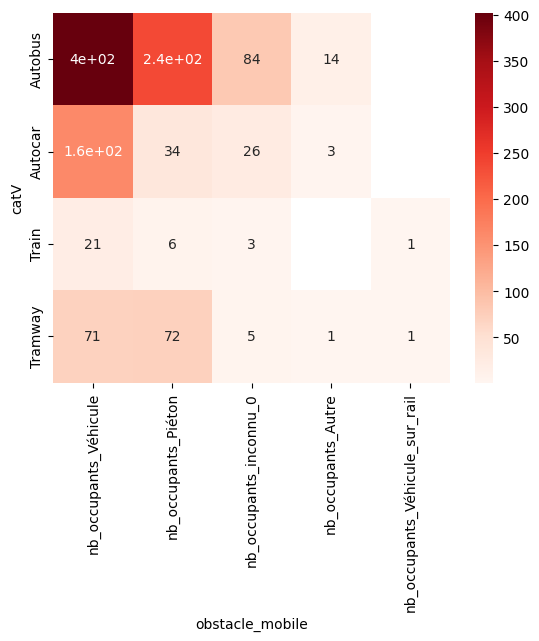

In [376]:
df2=df.groupby(['catV','obstacle_mobile'])['nb_occupants'].count().reset_index()

#df3 index are trasnports
#its columns obstacle_mobile
df3=df2.pivot(index='catV',columns='obstacle_mobile',values='nb_occupants')

#we keep only the list public_transport_list
public_transport_list=['Autobus','Autocar','Train','Tramway']
df3=df3.loc[public_transport_list]

#we delete the null-column
df3=df3.dropna(axis=1,how='all')

#we put back the columns
df3=df3[['Véhicule','Piéton','inconnu_0','Autre','Véhicule sur rail']]

#we rename the interesting columns
df3.rename(columns={'Autre':'nb_occupants_Autre'},inplace=True)
df3.rename(columns={'Piéton':'nb_occupants_Piéton'},inplace=True)
df3.rename(columns={'Véhicule':'nb_occupants_Véhicule'},inplace=True)
df3.rename(columns={'Véhicule sur rail':'nb_occupants_Véhicule_sur_rail'},inplace=True)
df3.rename(columns={'inconnu_0':'nb_occupants_inconnu_0'},inplace=True)

sns.heatmap(df3, annot=True,cmap="Reds")


heatmap of the dataset depending on the vehicle and the number of occupants


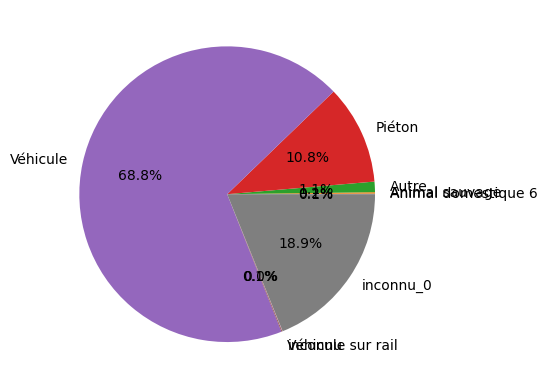

In [ ]:
df4=df.groupby(['obstacle_mobile'])['Num_Acc'].count().reset_index()

plt.pie(df4['Num_Acc'],labels=df4['obstacle_mobile'],autopct='%1.1f%%')
plt.show()

This gives a breakdown by class of the type of accident and shows that the majority of accidents occur between two vehicles

       obstacle_mobile  Num_Acc
0  Animal domestique 6       60
1       Animal sauvage      153
2                Autre     1000
3              Piéton     8878
4            Véhicule    57308
5   Véhicule sur rail      100
6              inconnu       51
7            inconnu_0    17475


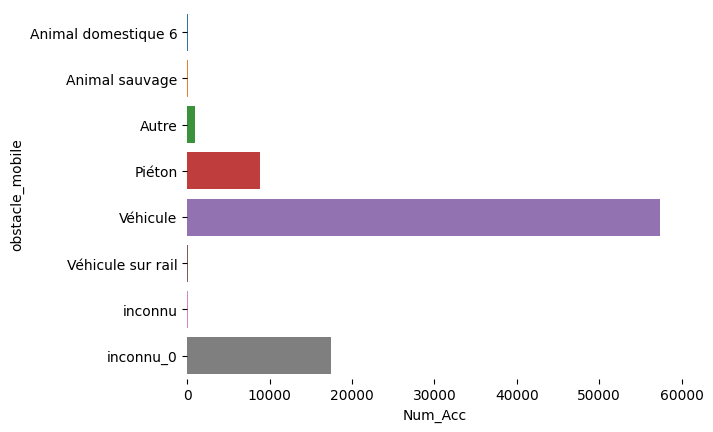

In [ ]:
print(df4)

sns.barplot(x='Num_Acc',y='obstacle_mobile',data=df4)
sns.despine(left=True, bottom=True)

<ipython-input-34-391a1e439354>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Num_Acc'][i]=1500


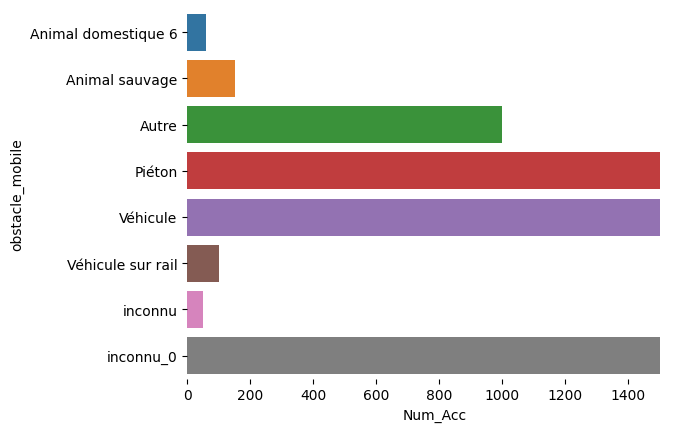

In [ ]:
df5=df4
# zoom on low values
for i in range(len(df5)):
    if df5['Num_Acc'][i]>1500:
        df5['Num_Acc'][i]=1500


sns.barplot(x='Num_Acc',y='obstacle_mobile',data=df5)
sns.despine(left=True, bottom=True)

<ipython-input-284-46872fcdd2b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Num_Acc'][i]=0


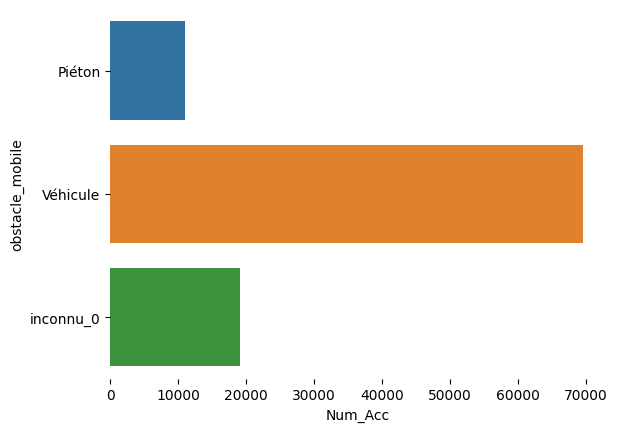

In [ ]:
df6=df4
#the three most common accidents
for i in range(len(df6)):
    if df6['Num_Acc'][i]<1500:
        df6['Num_Acc'][i]=0

df6=df6[df6['Num_Acc']!=0]


sns.barplot(x='Num_Acc',y='obstacle_mobile',data=df6)
sns.despine(left=True, bottom=True)

Part II
What are the main characteristics of these accidents? When do they occur?

In [ ]:
df_caracteristiques_accidents=pd.read_csv('/content/sample_data/caracteristiques_2016.csv', sep=',',encoding='latin-1')
df_caracteristiques_accidents=pd.DataFrame(df_caracteristiques_accidents.values, columns=df_caracteristiques_accidents.columns)
df_caracteristiques_accidents.info()
#we study the charactéristique dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59432 entries, 0 to 59431
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  59432 non-null  object
 1   an       59432 non-null  object
 2   mois     59432 non-null  object
 3   jour     59432 non-null  object
 4   hrmn     59432 non-null  object
 5   lum      59432 non-null  object
 6   agg      59432 non-null  object
 7   int      59432 non-null  object
 8   atm      59432 non-null  object
 9   col      59430 non-null  object
 10  com      59432 non-null  object
 11  adr      50263 non-null  object
 12  gps      47186 non-null  object
 13  lat      46585 non-null  object
 14  long     46585 non-null  object
 15  dep      59432 non-null  object
dtypes: object(16)
memory usage: 7.3+ MB


In [ ]:
df_caracteristiques_accidents.describe()

Num_Acc     an   mois   jour   hrmn    lum    agg    int    atm  \
count          59432  59432  59432  59432  59432  59432  59432  59432  59432   
unique         59432      1     12     31   1312      5      2      9      9   
top     201600000001     16     10      6   1800      1      2      1      1   
freq               1  59432   5596   2148    899  40578  38308  41629  47897   

            col    com           adr    gps      lat     long    dep  
count   59430.0  59432         50263  47186  46585.0  46585.0  59432  
unique      7.0    814         36915      5  31334.0  35810.0    101  
top         6.0     55  AUTOROUTE A1      M      0.0      0.0    750  
freq    19993.0   2402           299  45888   5681.0   5688.0   6466

In [ ]:
df_caracteristiques_accidents.head()

Num_Acc  an mois jour  hrmn lum agg int atm  col  com  \
0  201600000001  16    2    1  1445   1   2   1   8  3.0    5   
1  201600000002  16    3   16  1800   1   2   6   1  6.0    5   
2  201600000003  16    7   13  1900   1   1   1   1  6.0   11   
3  201600000004  16    8   15  1930   2   2   1   7  3.0  477   
4  201600000005  16   12   23  1100   1   2   3   1  3.0   11   

                   adr gps  lat long  dep  
0   46, rue Sonneville   M  0.0  0.0  590  
1  1a rue du cimetière   M  0.0  0.0  590  
2                  NaN   M  0.0  0.0  590  
3   52 rue victor hugo   M  0.0  0.0  590  
4     rue Joliot curie   M  0.0  0.0  590

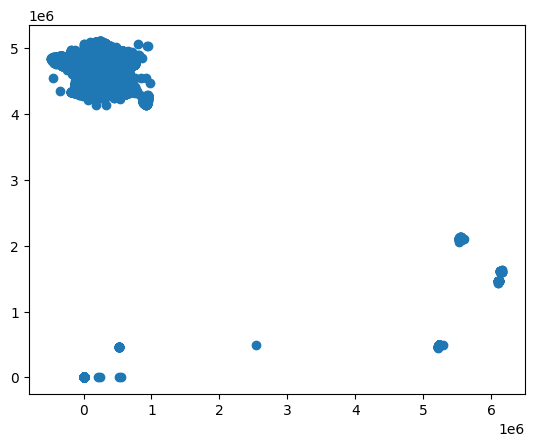

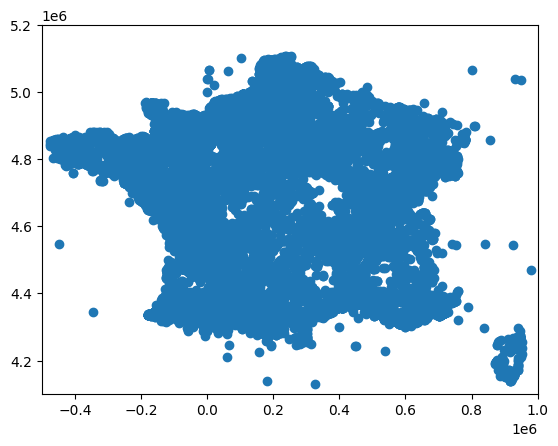

In [ ]:
#plot all the accident in france
plt.scatter(x=df_caracteristiques_accidents['long'],y=df_caracteristiques_accidents['lat'])
plt.show()

#plot all the accident in metropolitan france
plt.scatter(x=df_caracteristiques_accidents['long'],y=df_caracteristiques_accidents['lat'])
plt.xlim(-0.5*10**6,10**6)
plt.ylim(4.1*10**6,5.2*10**6)
plt.show()

We can see that the accidents occur in every parts of France

<Axes: xlabel='mois', ylabel='Num_Acc'>

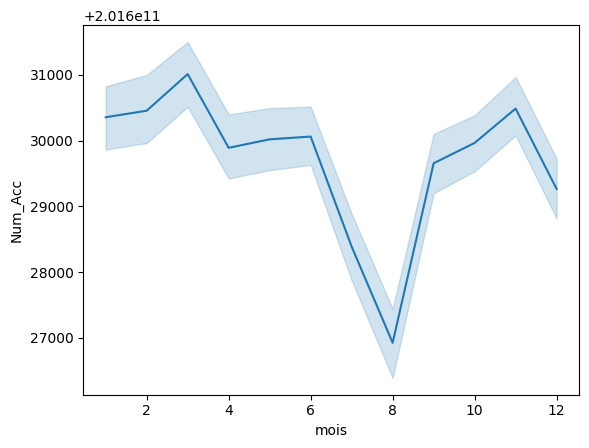

In [ ]:
sns.lineplot(x='mois',y='Num_Acc',data=df_caracteristiques_accidents)
#Create a time series graph, representing the evolution of traffic accidents over time.

There are less accidents during summer holydays



In [ ]:
df_caracteristiques_accidents.groupby(['dep'])['Num_Acc'].count().reset_index().sort_values(by='Num_Acc',ascending=False).head(10)
# Count and visualize the number of accidents by department. Show the 10 most dangerous departments

dep  Num_Acc
75  750     6466
12  130     4110
93  930     3031
92  920     2873
94  940     2721
69  690     2026
33  330     1641
91  910     1419
5    60     1409
59  590     1181

Paris is by far the most accident-prone place in France, closely followed by its inner suburbs, a sign that cities are indeed the areas where the risk of accidents is highest

In [ ]:
df_caracteristiques_accidents['weather_label']=df_caracteristiques_accidents['atm'].map(meteo_labels)

#Create a new column having an explicit weather label. Analyze this new column for more information on accidents.

In [ ]:
# Create two new columns, the first will contain the hour of the accident, the second will contain the minute.

df_caracteristiques_accidents['hrmn'] = df_caracteristiques_accidents['hrmn'].fillna(0)  # Replace NaN with 0 or any other default value
df_caracteristiques_accidents['heure_accident'] = df_caracteristiques_accidents['hrmn'].apply(lambda x: int(x / 100))
df_caracteristiques_accidents['minute_accident'] = df_caracteristiques_accidents['hrmn'].apply(lambda x: x % 100)
#what is the most dangerous hour
df_caracteristiques_accidents.groupby(['heure_accident'])['Num_Acc'].count().reset_index().sort_values(by='Num_Acc',ascending=False).head(1)

heure_accident  Num_Acc
17              17     4981

the most dangerous hour is 5pm when people get out of their jobs

In [ ]:
#The top dangerous hours and departements, Paris is kinda scary
df_caracteristiques_accidents.groupby(['dep','heure_accident'])['Num_Acc'].count().reset_index().sort_values(by='Num_Acc',ascending=False).head(10)

dep  heure_accident  Num_Acc
1755  750              18      450
1754  750              17      437
1756  750              19      426
1746  750               9      399
1753  750              16      392
1752  750              15      380
1751  750              14      367
293   130              18      362
1749  750              12      358
1750  750              13      355

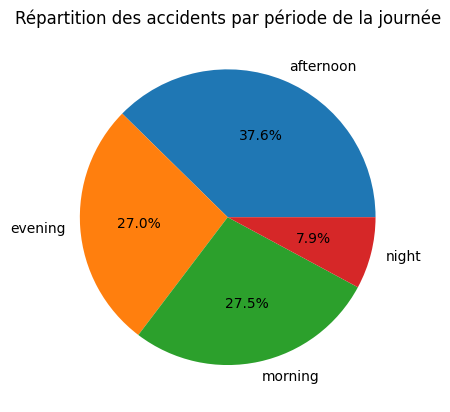

In [ ]:
df_caracteristiques_accidents['period_of_day']=df_caracteristiques_accidents['heure_accident'].apply(
    lambda x: 'morning' if x>=6 and x<12
    else ('afternoon' if x>=12 and x<18
    else ('evening' if x>=18 and x<=23
    else 'night')))

plt.pie(df_caracteristiques_accidents.groupby(
    ['period_of_day'])['Num_Acc'].count().reset_index()['Num_Acc'],
    labels=df_caracteristiques_accidents.groupby(
        ['period_of_day'])['Num_Acc'].count().reset_index()['period_of_day'],
        autopct='%1.1f%%')
plt.title('Répartition des accidents par période de la journée')
plt.show()


It can be seen that the majority of accidents take place in the afternoon